# Text Analysis - Python

In [692]:
pwd

'C:\\Users\\dell\\Desktop\\Python\\Sandeep'

In [693]:
import pandas as pd #import pandas library as pd
import sklearn #Import sklearn library 
import warnings
warnings.filterwarnings('ignore')

In [694]:
df = pd.read_excel(r'IQPTA.xlsx', sheet_name='Data') #read excel data using pd
df.head() #Display top 5 rows of the frame

,Incident ID*+,Operational Categorization Tier 1+,Operational Categorization Tier 2,Operational Categorization Tier 3,Notes,Summary*,Resolution,Note Analysis,Note Analysis- Main Category
0,20240,DUO MFA,DUO Authentication,Send Activation Code,SSO ID : najera OB trainer requested for a Duo...,Onboarding_Duo Activation Link,Duo Mobile instructions SMS'ed to,NaN,NaN
1,20963,Password & User ID Management,Concentrix SSO ID /Login ID,Password Reset,Problem Description: unable to log in to pc. L...,Concentrix SSO Password Reset/Unlock,Password has reset and sent to manager.,NaN,NaN
2,20517,Password & User ID Management,Concentrix SSO ID /Login ID,Password Reset,Is caller is a service Recipient : SSO ID : ...,Concentrix SSO ID Password Reset,Password Reset done for the agent,NaN,NaN
3,20030,Client Applications,Client Applications,Add,Issue: 5 agents who were about to log in are u...,Anthem - Wah US - % agents unable to connect t...,"RFI, Sm Jessie contacted caller on Teams",NaN,NaN
4,20226,DUO MFA,DUO Authentication,Send Activation Code,SSO ID : .hahn OB trainer requested for a Duo ...,Onboarding_Duo Activation Link,Duo Mobile instructions SMS'ed to,NaN,NaN


In [695]:
df.shape #Check the no of columns and rows in the data frame

(24, 9)

In [696]:
df.columns #Check the columns and its data type

Index(['Incident ID*+', 'Operational Categorization Tier 1+',
       'Operational Categorization Tier 2',
       'Operational Categorization Tier 3', 'Notes', 'Summary*', 'Resolution',
       'Note Analysis', 'Note Analysis- Main Category'],
      dtype='object')

In [697]:
df.info() #View info of the frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
Incident ID*+                         24 non-null int64
Operational Categorization Tier 1+    23 non-null object
Operational Categorization Tier 2     23 non-null object
Operational Categorization Tier 3     21 non-null object
Notes                                 24 non-null object
Summary*                              24 non-null object
Resolution                            24 non-null object
Note Analysis                         0 non-null float64
Note Analysis- Main Category          0 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.8+ KB


In [698]:
df.index #View Index of the frame

RangeIndex(start=0, stop=24, step=1)

In [699]:
#let's remove duplicates first
df['Dup'] =df.duplicated(subset=None, keep='first')

In [700]:
df.head()

,Incident ID*+,Operational Categorization Tier 1+,Operational Categorization Tier 2,Operational Categorization Tier 3,Notes,Summary*,Resolution,Note Analysis,Note Analysis- Main Category,Dup
0,20240,DUO MFA,DUO Authentication,Send Activation Code,SSO ID : najera OB trainer requested for a Duo...,Onboarding_Duo Activation Link,Duo Mobile instructions SMS'ed to,NaN,NaN,False
1,20963,Password & User ID Management,Concentrix SSO ID /Login ID,Password Reset,Problem Description: unable to log in to pc. L...,Concentrix SSO Password Reset/Unlock,Password has reset and sent to manager.,NaN,NaN,False
2,20517,Password & User ID Management,Concentrix SSO ID /Login ID,Password Reset,Is caller is a service Recipient : SSO ID : ...,Concentrix SSO ID Password Reset,Password Reset done for the agent,NaN,NaN,False
3,20030,Client Applications,Client Applications,Add,Issue: 5 agents who were about to log in are u...,Anthem - Wah US - % agents unable to connect t...,"RFI, Sm Jessie contacted caller on Teams",NaN,NaN,False
4,20226,DUO MFA,DUO Authentication,Send Activation Code,SSO ID : .hahn OB trainer requested for a Duo ...,Onboarding_Duo Activation Link,Duo Mobile instructions SMS'ed to,NaN,NaN,False


In [701]:
(df.iloc[:,7:9]).head()

,Note Analysis,Note Analysis- Main Category
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [702]:
cols = [0,1,2,3,7,8,9]  #column indexes we dont need
df.drop(df.columns[cols],axis=1,inplace=True)

In [703]:
df.iloc[:,0] #find 4th Column

0     SSO ID : najera OB trainer requested for a Duo...
1     Problem Description: unable to log in to pc. L...
2     Is caller is a service Recipient :   SSO ID : ...
3     Issue: 5 agents who were about to log in are u...
4     SSO ID : .hahn OB trainer requested for a Duo ...
5     User Modem is not working fine and making beep...
6     Problem Description: Users unable to connect t...
7     Contact Number::  SSO ID::  Request Descriptio...
8     User called in to get Duo enrollment link sent...
9                   headset mic is not working contact 
10    Contact Number::  SSO ID::  Problem Descriptio...
11    Contact Number::  SSO ID::  Request Descriptio...
12    Problem Description: Please reset the SSO pw f...
13    Unable to VPN  User ID : @concentrix.com User ...
14    User is heaving issue with the headset  user i...
15    Issue: User got the password reset twice, stil...
16    Problem Description: please unlock and reset s...
17    Issue: Cisco Anyconnect vpn issue Error: l

In [704]:
import re # library to clean data 
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np

In [705]:
stop_words_file=pd.read_csv('SmartStoplist.txt', sep=" ", header=None) #import SmartStoplist.txt file
stop_words_file = 'SmartStoplist.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [706]:
df['Notes Cleaned'] = df['Notes'].apply(preprocess)

In [707]:
df.head()

,Notes,Summary*,Resolution,Notes Cleaned
0,SSO ID : najera OB trainer requested for a Duo...,Onboarding_Duo Activation Link,Duo Mobile instructions SMS'ed to,sso id najera ob trainer request duo activ lin...
1,Problem Description: unable to log in to pc. L...,Concentrix SSO Password Reset/Unlock,Password has reset and sent to manager.,problem descript unabl log pc login id collin ...
2,Is caller is a service Recipient : SSO ID : ...,Concentrix SSO ID Password Reset,Password Reset done for the agent,caller servic recipi sso id account valid vali...
3,Issue: 5 agents who were about to log in are u...,Anthem - Wah US - % agents unable to connect t...,"RFI, Sm Jessie contacted caller on Teams",issu agent log unabl connect vpn concentrix do...
4,SSO ID : .hahn OB trainer requested for a Duo ...,Onboarding_Duo Activation Link,Duo Mobile instructions SMS'ed to,sso id hahn ob trainer request duo activ link ...


In [708]:
#Most Common Words
from collections import Counter
Counter(" ".join(df["Notes Cleaned"]).split()).most_common(25)

[('user', 21),
 ('id', 17),
 ('sso', 14),
 ('type', 13),
 ('issu', 13),
 ('concentrix', 11),
 ('number', 10),
 ('request', 9),
 ('agent', 9),
 ('password', 9),
 ('duo', 8),
 ('descript', 8),
 ('vpn', 8),
 ('call', 8),
 ('phone', 8),
 ('login', 7),
 ('impact', 7),
 ('locat', 7),
 ('home', 7),
 ('time', 7),
 ('categori', 7),
 ('unabl', 6),
 ('reset', 6),
 ('current', 6),
 ('shift', 6)]

In [709]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [710]:
#nice library to produce wordclouds
#Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline


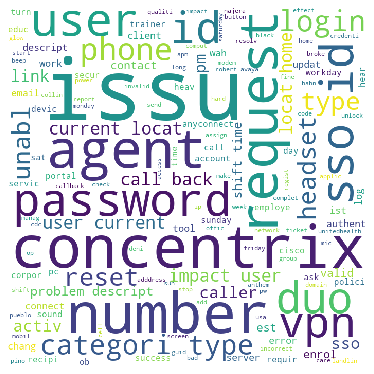

In [711]:
all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in df["Notes Cleaned"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()



In [712]:
#Prepare text for LDA Analysis

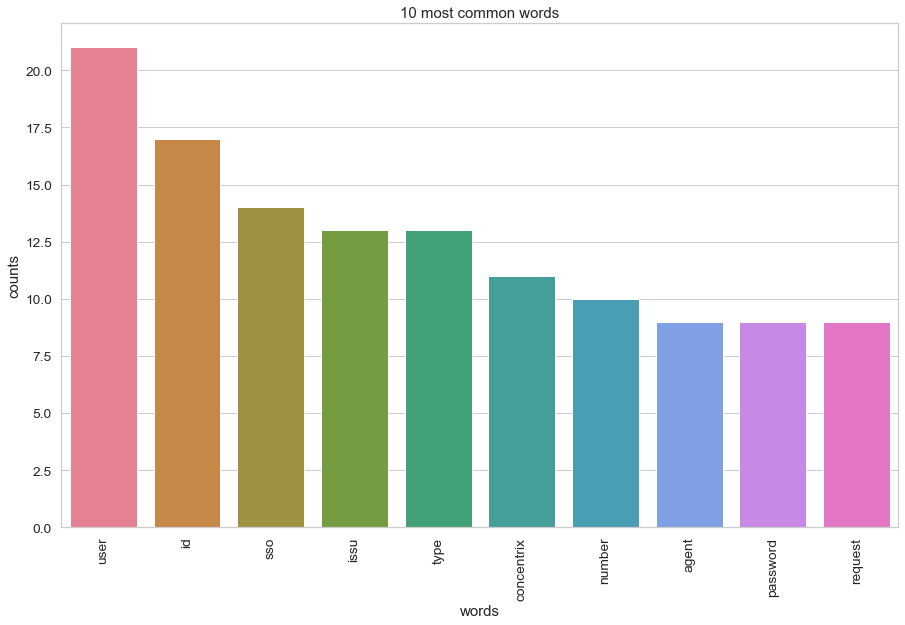

In [713]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['Notes Cleaned'])# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [714]:
#LDA model training and results visualization

In [855]:
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 7
number_words = 15# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
id concentrix password email agent est pm shift time sso sunday day reset error home

Topic #1:
link enrol phone duo user landlin mic contact agent concentrix work sso request descript type

Topic #2:
issu headset agent user number time shift concentrix vpn wah ist client caller request type

Topic #3:
pm shift time turn pc power friday screen black monday complet button glow issu mic

Topic #4:
sso login reset user password valid id concentrix chang descript problem caller request tool requir

Topic #5:
user id type categori number duo phone current home descript impact locat sso updat activ

Topic #6:
sso id agent vpn unabl type request connect activ trainer ob duo user link issu


In [856]:
len(df)

24

In [857]:
topic_results =lda.transform(count_data) #call lda and call count_data

In [858]:
topic_results.shape #checking the shape after converting in topic

(24, 7)

In [859]:
topic_results[0]  # probabilty of all 7 topic in index 0

array([0.01300151, 0.01300867, 0.01300214, 0.01298706, 0.01300331,
       0.0130201 , 0.9219772 ])

In [860]:
topic_results[0].round(2) #Checking in round 

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.92])

In [861]:
topic_results[0].argmax() # applying argmax() to check topic with highest probability in index 0

6

In [862]:
topic_results.argmax(axis=1)

array([6, 5, 4, 2, 6, 5, 6, 5, 1, 2, 5, 5, 4, 5, 2, 0, 4, 2, 2, 3, 4, 5,
       2, 6], dtype=int64)

In [863]:
df['Topics']=topic_results.argmax(axis=1)

In [864]:
df

,Notes,Summary*,Resolution,Notes Cleaned,Topics
0,SSO ID : najera OB trainer requested for a Duo...,Onboarding_Duo Activation Link,Duo Mobile instructions SMS'ed to,sso id najera ob trainer request duo activ lin...,6
1,Problem Description: unable to log in to pc. L...,Concentrix SSO Password Reset/Unlock,Password has reset and sent to manager.,problem descript unabl log pc login id collin ...,5
2,Is caller is a service Recipient : SSO ID : ...,Concentrix SSO ID Password Reset,Password Reset done for the agent,caller servic recipi sso id account valid vali...,4
3,Issue: 5 agents who were about to log in are u...,Anthem - Wah US - % agents unable to connect t...,"RFI, Sm Jessie contacted caller on Teams",issu agent log unabl connect vpn concentrix do...,2
4,SSO ID : .hahn OB trainer requested for a Duo ...,Onboarding_Duo Activation Link,Duo Mobile instructions SMS'ed to,sso id hahn ob trainer request duo activ link ...,6
5,User Modem is not working fine and making beep...,User Modem is not working fine and making beep...,Proceeding with the closure of the ticket as w...,user modem work fine make beep sound turn emai...,5
6,Problem Description: Users unable to connect t...,VPN - Report an Incident,Issue resolved by resetting Users SS0 Password,problem descript user unabl connect vpn assign...,6
7,Contact Number:: SSO ID:: Request Descriptio...,DUO MFA - Raise a request,Duo Mobile instructions SMS'ed to,contact number sso id request descript agent p...,5
8,User called in to get Duo enrollment link sent...,DUO Enrollment Link,Updated the DUO number to a landline,user call duo enrol link phone landlin enrol link,1
9,headset mic is not working contact,headset mic is not working,Agent is to coordinate with their TL/Trainer t...,headset mic work contact,2


In [865]:
#add a new columns Note Analysis and Note Analysis - Main Category 
category= pd.cut(df['Topics'],bins=[0,1,2,3,4,5,6,7],labels=['Client Issue','Hardware devices like modem/headset issue','Home devices like PC APM Issue','Login ID/SSO Password reset/Unlock Issue','VPN Issue','DUO Authentication and activation link request','Avaya Issue'])
df.insert(5,'Note Analysis',category)
category= pd.cut(df['Topics'],bins=[0,1,2,3,4,5,6,7],labels=['Client Application','Hardware/Desktop/Laptop','Work from Home-Staff','Password/User ID Mgmt','VPN','DUO MFA','Enterprise Applications'])
df.insert(6,'Note Analysis - Main Category',category)

In [866]:
df

,Notes,Summary*,Resolution,Notes Cleaned,Topics,Note Analysis,Note Analysis - Main Category
0,SSO ID : najera OB trainer requested for a Duo...,Onboarding_Duo Activation Link,Duo Mobile instructions SMS'ed to,sso id najera ob trainer request duo activ lin...,6,DUO Authentication and activation link request,DUO MFA
1,Problem Description: unable to log in to pc. L...,Concentrix SSO Password Reset/Unlock,Password has reset and sent to manager.,problem descript unabl log pc login id collin ...,5,VPN Issue,VPN
2,Is caller is a service Recipient : SSO ID : ...,Concentrix SSO ID Password Reset,Password Reset done for the agent,caller servic recipi sso id account valid vali...,4,Login ID/SSO Password reset/Unlock Issue,Password/User ID Mgmt
3,Issue: 5 agents who were about to log in are u...,Anthem - Wah US - % agents unable to connect t...,"RFI, Sm Jessie contacted caller on Teams",issu agent log unabl connect vpn concentrix do...,2,Hardware devices like modem/headset issue,Hardware/Desktop/Laptop
4,SSO ID : .hahn OB trainer requested for a Duo ...,Onboarding_Duo Activation Link,Duo Mobile instructions SMS'ed to,sso id hahn ob trainer request duo activ link ...,6,DUO Authentication and activation link request,DUO MFA
5,User Modem is not working fine and making beep...,User Modem is not working fine and making beep...,Proceeding with the closure of the ticket as w...,user modem work fine make beep sound turn emai...,5,VPN Issue,VPN
6,Problem Description: Users unable to connect t...,VPN - Report an Incident,Issue resolved by resetting Users SS0 Password,problem descript user unabl connect vpn assign...,6,DUO Authentication and activation link request,DUO MFA
7,Contact Number:: SSO ID:: Request Descriptio...,DUO MFA - Raise a request,Duo Mobile instructions SMS'ed to,contact number sso id request descript agent p...,5,VPN Issue,VPN
8,User called in to get Duo enrollment link sent...,DUO Enrollment Link,Updated the DUO number to a landline,user call duo enrol link phone landlin enrol link,1,Client Issue,Client Application
9,headset mic is not working contact,headset mic is not working,Agent is to coordinate with their TL/Trainer t...,headset mic work contact,2,Hardware devices like modem/headset issue,Hardware/Desktop/Laptop
